In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [2]:
library_versions = {
    "pandas": pd.__version__,
    "numpy": np.__version__,
    "matplotlib": matplotlib.__version__,
    "seaborn": sns.__version__,
}
library_versions

{'pandas': '2.2.2',
 'numpy': '1.26.4',
 'matplotlib': '3.9.2',
 'seaborn': '0.13.2'}

In [3]:
# adding this to avoid truncated results
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
loan_data_og=pd.read_csv('loan.csv',low_memory=False)

In [5]:
# Code was failing while reading the file, so added low_memory=False this avoids misinterpretation caused during reading the file
# Also we got to know column 47 has mixed datatype. We need to fix it
loan_data=pd.read_csv('loan.csv',low_memory=False)

<h2>Identifying correct datatypes and coverting those</h2>

In [6]:
loan_data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [7]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [8]:
# Dictionary of columns and their corresponding data types
int_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 
                  'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 
                  'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                  'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
                  'collection_recovery_fee', 'last_pymnt_amnt']

date_columns = ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line']

#the below column have % in it
percentage_columns = ['int_rate', 'revol_util']

In [9]:
# Clean and convert data types
for col in loan_data.columns:
    # Convert percentage columns
    if col in percentage_columns:
        loan_data[col] = loan_data[col].str.rstrip('%').astype('float') / 100.0
    
    # Convert int columns
    elif col in int_columns:
        loan_data[col] = pd.to_numeric(loan_data[col], errors='coerce')
    
    # Convert date columns
    elif col in date_columns:
        loan_data[col] = pd.to_datetime(loan_data[col], format='%b-%y', errors='coerce')
    
    # Clean term column it has months int it
    elif col == 'term':
        loan_data[col] = loan_data[col].str.strip().str.replace(' months', '').astype('int')
    
    # Clean employment length it has year,years, <, +
    elif col == 'emp_length':
        loan_data[col] = loan_data[col].replace('n/a', np.nan)
        loan_data[col] = loan_data[col].replace('< 1 year', '0 years')
        loan_data[col] = loan_data[col].replace('10+ years', '10 years')
        loan_data[col] = loan_data[col].str.replace(' years', '').str.replace(' year', '').astype(float)

In [10]:
loan_data.dtypes

id                                         int64
member_id                                  int64
loan_amnt                                  int64
funded_amnt                                int64
funded_amnt_inv                          float64
term                                       int32
int_rate                                 float64
installment                              float64
grade                                     object
sub_grade                                 object
emp_title                                 object
emp_length                               float64
home_ownership                            object
annual_inc                               float64
verification_status                       object
issue_d                           datetime64[ns]
loan_status                               object
pymnt_plan                                object
url                                       object
desc                                      object
purpose             

In [11]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36,0.1065,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,NaN,NaN,3,0,13648,0.837,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-05-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60,0.1527,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,1999-04-01,5,NaN,NaN,3,0,1687,0.094,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36,0.1596,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,NaN,NaN,2,0,2956,0.985,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-05-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,1996-02-01,1,35.0,NaN,10,0,5598,0.210,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,NaT,2016-04-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [12]:
loan_data[date_columns].head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,earliest_cr_line
0,2011-12-01,2015-01-01,NaT,2016-05-01,1985-01-01
1,2011-12-01,2013-04-01,NaT,2013-09-01,1999-04-01
2,2011-12-01,2014-06-01,NaT,2016-05-01,2001-11-01
3,2011-12-01,2015-01-01,NaT,2016-04-01,1996-02-01
4,2011-12-01,2016-05-01,2016-06-01,2016-05-01,1996-01-01


In [13]:
object_cols = loan_data.select_dtypes(include=['object']).columns

In [14]:
object_cols

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status',
       'application_type'],
      dtype='object')

In [15]:
categorical_cols = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 
                   'loan_status', 'purpose', 'addr_state']

<h2>Handling nulls and outliers</h2>

In [16]:
# Handle missing values for int columns
loan_data[int_columns] = loan_data[int_columns].fillna(loan_data[int_columns].median())

In [17]:
# Remove outliers using IQR method for key numeric columns
key_numeric_cols = ['loan_amnt', 'annual_inc', 'dti', 'revol_util']
for col in key_numeric_cols:
    Q1 = loan_data[col].quantile(0.25)
    Q3 = loan_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    loan_data[col] = loan_data[col].clip(lower=lower_bound, upper=upper_bound)

In [18]:
# Removing duplicates if any
loan_data = loan_data.drop_duplicates()

In [19]:
loan_data[key_numeric_cols].describe()

,loan_amnt,annual_inc,dti,revol_util
count,39717.000000,39717.000000,39717.000000,39667.000000
mean,11101.747363,65247.891522,13.315130,0.488322
std,7122.427394,32703.476426,6.678594,0.283326
min,500.000000,4000.000000,0.000000,0.000000
25%,5500.000000,40404.000000,8.170000,0.254000
50%,10000.000000,59000.000000,13.400000,0.493000
75%,15000.000000,82300.000000,18.600000,0.724000
max,29250.000000,145144.000000,29.990000,0.999000


In [20]:
loan_data_og[key_numeric_cols].describe()

,loan_amnt,annual_inc,dti
count,39717.000000,3.971700e+04,39717.000000
mean,11219.443815,6.896893e+04,13.315130
std,7456.670694,6.379377e+04,6.678594
min,500.000000,4.000000e+03,0.000000
25%,5500.000000,4.040400e+04,8.170000
50%,10000.000000,5.900000e+04,13.400000
75%,15000.000000,8.230000e+04,18.600000
max,35000.000000,6.000000e+06,29.990000


Handeliing Null Values

In [21]:

# Count the null values in each column
null_summary = pd.DataFrame({
    "Column": loan_data.columns,
    "Null_Count": loan_data.isnull().sum(),
    "Percentage_Null": (loan_data.isnull().sum() / len(loan_data)) * 100
}).sort_values(by="Null_Count", ascending=False)

# Print the first 10 rows for better readability
print(null_summary.to_string(index=False))


                        Column  Null_Count  Percentage_Null
     verification_status_joint       39717       100.000000
              annual_inc_joint       39717       100.000000
          mo_sin_old_rev_tl_op       39717       100.000000
            mo_sin_old_il_acct       39717       100.000000
                       bc_util       39717       100.000000
                bc_open_to_buy       39717       100.000000
                   avg_cur_bal       39717       100.000000
          acc_open_past_24mths       39717       100.000000
                  inq_last_12m       39717       100.000000
                   total_cu_tl       39717       100.000000
                        inq_fi       39717       100.000000
              total_rev_hi_lim       39717       100.000000
                      all_util       39717       100.000000
                    max_bal_bc       39717       100.000000
                   open_rv_24m       39717       100.000000
                   open_rv_12m       397

In [22]:
# Drop columns with too many missing values (>50%)
missing_pct = loan_data.isnull().sum() / len(loan_data)
cols_to_drop = missing_pct[missing_pct > 0.5].index

In [23]:
#printing the columns which needs to drop
cols_to_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [24]:
#Droping the columns
loan_data = loan_data.drop(columns=cols_to_drop)

In [25]:
#Printing after dropping
# Count the null values in each column
null_summary = pd.DataFrame({
    "Column": loan_data.columns,
    "Null_Count": loan_data.isnull().sum(),
    "Percentage_Null": (loan_data.isnull().sum() / len(loan_data)) * 100
}).sort_values(by="Null_Count", ascending=False)

# Print the first 10 rows for better readability
print(null_summary.to_string(index=False))

                    Column  Null_Count  Percentage_Null
                      desc       12942        32.585543
                 emp_title        2459         6.191303
                emp_length        1075         2.706650
      pub_rec_bankruptcies         697         1.754916
              last_pymnt_d          71         0.178765
collections_12_mths_ex_med          56         0.140998
  chargeoff_within_12_mths          56         0.140998
                revol_util          50         0.125891
                 tax_liens          39         0.098195
                     title          11         0.027696
        last_credit_pull_d           2         0.005036
           total_rec_prncp           0         0.000000
                 out_prncp           0         0.000000
       initial_list_status           0         0.000000
             out_prncp_inv           0         0.000000
                 total_acc           0         0.000000
               total_pymnt           0         0

In [26]:
# Drop rows where critical columns are missing
critical_cols = ['loan_amnt', 'int_rate', 'grade', 'annual_inc', 'loan_status']
loan_data = loan_data.dropna(subset=critical_cols)

In [27]:
#Old data set shape
loan_data_og.shape

(39717, 111)

In [28]:
#After cleaning Data set shape
loan_data.shape

(39717, 54)

In [29]:
loan_data['emp_length'].value_counts().head()

emp_length
10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
Name: count, dtype: int64

<h2>Performing Data Analytics</h2>

In [30]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [31]:
# Create default flag (1 for default, 0 for non-default)
loan_data['is_default'] = loan_data['loan_status'].apply(lambda x: x == 'Charged Off')

In [32]:
loan_data['is_default'].value_counts(normalize=True)

is_default
False    0.858323
True     0.141677
Name: proportion, dtype: float64

In [33]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,is_default
0,1077501,1296599,5000,5000,4975.0,36,0.1065,162.87,B,B2,NaN,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,0.837,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,False
1,1077430,1314167,2500,2500,2500.0,60,0.1527,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,0.094,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,True
2,1077175,1313524,2400,2400,2400.0,36,0.1596,84.33,C,C5,NaN,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,0.985,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,False
3,1076863,1277178,10000,10000,10000.0,36,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,0.210,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,False
4,1075358,1311748,3000,3000,3000.0,60,0.1269,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,0.539,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,False


In [34]:
# Selecting potential colums which can be top 5 driver variable for default
factors = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 
           'inq_last_6mths', 'open_acc', 'revol_util', 'total_acc']

# Calculate how factors is impacting default
impact = []
for col in factors:
    x = loan_data[col].corr(loan_data['is_default'])
    impact.append((col, abs(x)))

In [35]:
# Sort by absolute correlation
impact.sort(key=lambda x: abs(x[1]), reverse=True)

In [36]:
print("Top factors impacting loan default in consumers:")
for col, corr in impact:
    print(f"{col}: {corr:.4f}")

Top factors impacting loan default in consumers:
int_rate: 0.1963
revol_util: 0.0966
inq_last_6mths: 0.0717
annual_inc: 0.0685
loan_amnt: 0.0470
dti: 0.0417
total_acc: 0.0236
delinq_2yrs: 0.0199
open_acc: 0.0107


<h2>Key Points of the Correlation Matrix</h2>

<table>
<tr>
    <th>Values</th>
    <td>The correlation coefficient ranges from -1 to 1:<br>
        1: Perfect positive correlation.<br>
        -1: Perfect negative correlation.<br>
        0: No correlation.</td>
</tr>
</table>

<h3>Key Variables</h3>
<ul>
    <li>loan_amnt: Amount of loan issued.</li>
    <li>int_rate: Interest rate of the loan.</li>
    <li>annual_inc: Annual income of the borrower.</li>
    <li>dti: Debt-to-income ratio.</li>
    <li>revol_util: Utilization of revolving credit.</li>
    <li>is_default: Binary indicator for loan default.</li>
</ul>

<h3>Analysis</h3>
<ul>
    <li>Positive Correlations:<br>
        Variables like loan_amnt and int_rate might show a moderate positive correlation, suggesting higher loan amounts could be associated with higher interest rates.<br>
        annual_inc and loan_amnt may show a positive relationship, indicating borrowers with higher incomes tend to secure larger loans.</li>
    <li>Negative Correlations:<br>
        A variable like annual_inc might have a negative correlation with is_default, implying that higher income borrowers are less likely to default.</li>
    <li>Weak Correlations:<br>
        Variables with near-zero correlation (e.g., dti and annual_inc) signify little to no linear relationship.</li>
</ul>

<h3>Heatmap Interpretation</h3>
<ul>
    <li>Bright colors (e.g., red for high positive, blue for high negative) identify strong correlations.</li>
    <li>Pale colors around zero suggest weak or no correlation.</li>
</ul>

<p>This analysis helps identify which variables are strongly related and can guide feature selection or engineering for predictive modeling.</p>

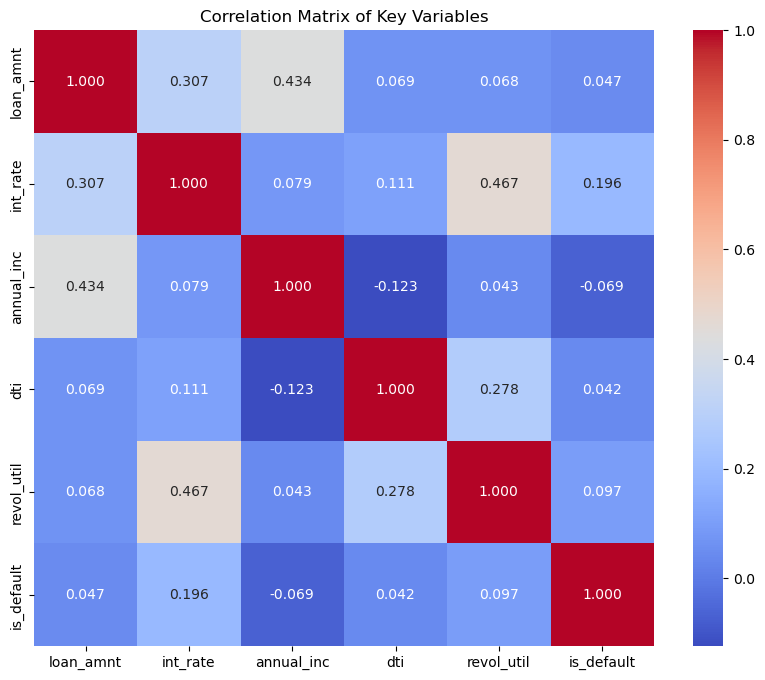

In [37]:
# Calculate correlation matrix for key variables
correlation_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util', 'is_default']
correlation_matrix = loan_data[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm')
plt.title('Correlation Matrix of Key Variables')
plt.show()

<h4>These 5 are the top factors impacting loan default</h4>
int_rate: 0.1963
revol_util: 0.0966
inq_last_6mths: 0.0717
annual_inc: 0.0685
loan_amnt: 0.0470

In [38]:
default_by_grade = loan_data.groupby('grade')['is_default'].mean().sort_values(ascending=False)
print("Default rates by grade:")
print(default_by_grade)

Default rates by grade:
grade
G    0.319620
F    0.304099
E    0.251583
D    0.210665
C    0.166337
B    0.118552
A    0.059693
Name: is_default, dtype: float64


<h3>Key business metrics</h3>

In [39]:
print("Key Business Metrics:")
print(f"Average Loan Amount: ${loan_data['loan_amnt'].mean():,.2f}")
print(f"Default Rate: {(loan_data['is_default'].mean() * 100):.2f}%")
print(f"Average Interest Rate: {loan_data['int_rate'].mean():.2f}%")

Key Business Metrics:
Average Loan Amount: $11,101.75
Default Rate: 14.17%
Average Interest Rate: 0.12%


In [40]:
default_by_purpose_grade = loan_data.pivot_table(
    values='is_default',
    index='purpose',
    columns='grade',
    aggfunc='mean'
).round(3)

print("\
Default Rates by Purpose and Grade:")
print(default_by_purpose_grade)

Default Rates by Purpose and Grade:
grade                   A      B      C      D      E      F      G
purpose                                                            
car                 0.053  0.110  0.148  0.192  0.125  0.364  0.500
credit_card         0.045  0.091  0.134  0.162  0.222  0.235  0.103
debt_consolidation  0.063  0.113  0.161  0.208  0.256  0.334  0.324
educational         0.062  0.196  0.152  0.323  0.429  0.250  0.000
home_improvement    0.043  0.110  0.175  0.197  0.196  0.222  0.125
house               0.030  0.093  0.186  0.235  0.400  0.467  0.333
major_purchase      0.044  0.086  0.151  0.219  0.192  0.143  0.167
medical             0.057  0.152  0.221  0.226  0.190  0.286  0.667
moving              0.099  0.195  0.137  0.206  0.250  0.111  0.200
other               0.076  0.134  0.198  0.246  0.291  0.238  0.409
renewable_energy    0.167  0.162  0.294  0.000  0.000  0.333  1.000
small_business      0.115  0.254  0.273  0.312  0.324  0.371  0.447
vacation    

<h3>Unvariate Analysis</h3>

Text(0.5, 1.0, 'Interest Rate Distribution by Default Status')

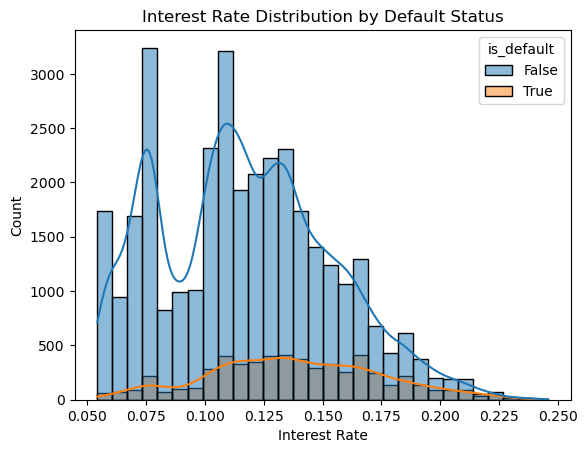

In [41]:
sns.histplot(data=loan_data, x='int_rate', hue='is_default', bins=30, kde=True)
plt.xlabel('Interest Rate')
plt.title('Interest Rate Distribution by Default Status')

Text(0.5, 1.0, 'Loan Amount Distribution by Default Status')

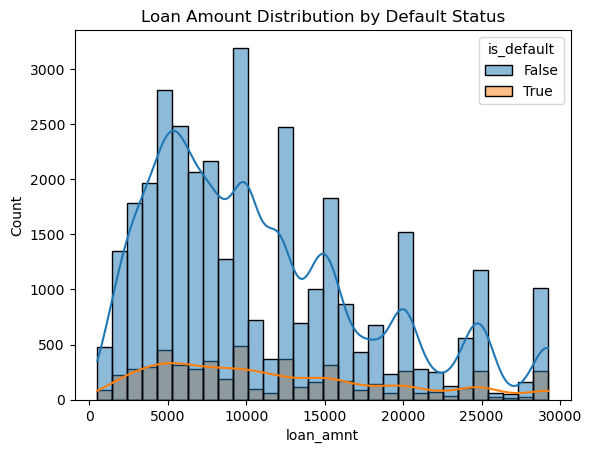

In [42]:
sns.histplot(data=loan_data, x='loan_amnt', hue='is_default', bins=30, kde=True)
plt.title('Loan Amount Distribution by Default Status')

Higher loan amounts show slightly higher default rates

Default rates increase significantly with higher interest rates

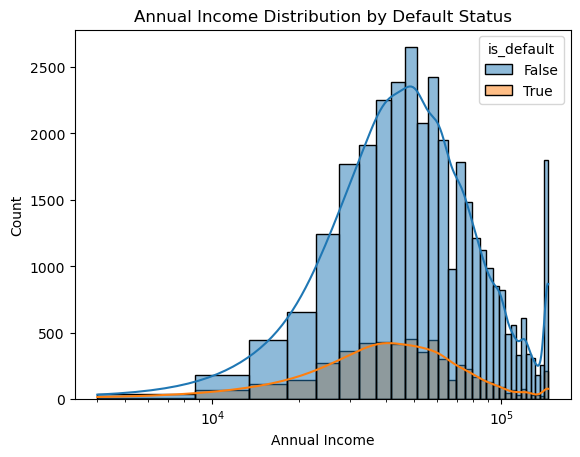

In [43]:
sns.histplot(data=loan_data, x='annual_inc', hue='is_default', bins=30, kde=True)
plt.xlabel('Annual Income')
plt.title('Annual Income Distribution by Default Status')
plt.xscale('log')

Lower income borrowers tend to default more frequently

Text(0.5, 1.0, 'Loan Grades by Default Status')

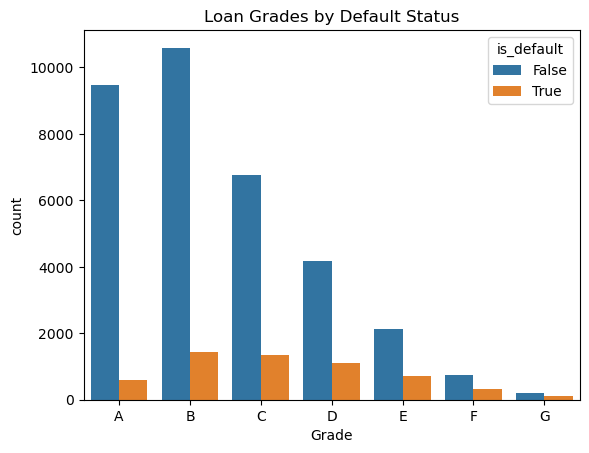

In [44]:
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.countplot(data=loan_data, x='grade', hue='is_default',order=grade_order)
plt.xlabel('Grade')
plt.title('Loan Grades by Default Status')

Grade A-C loans have lower default percentages than D-G
Highest percentage of defaulter G

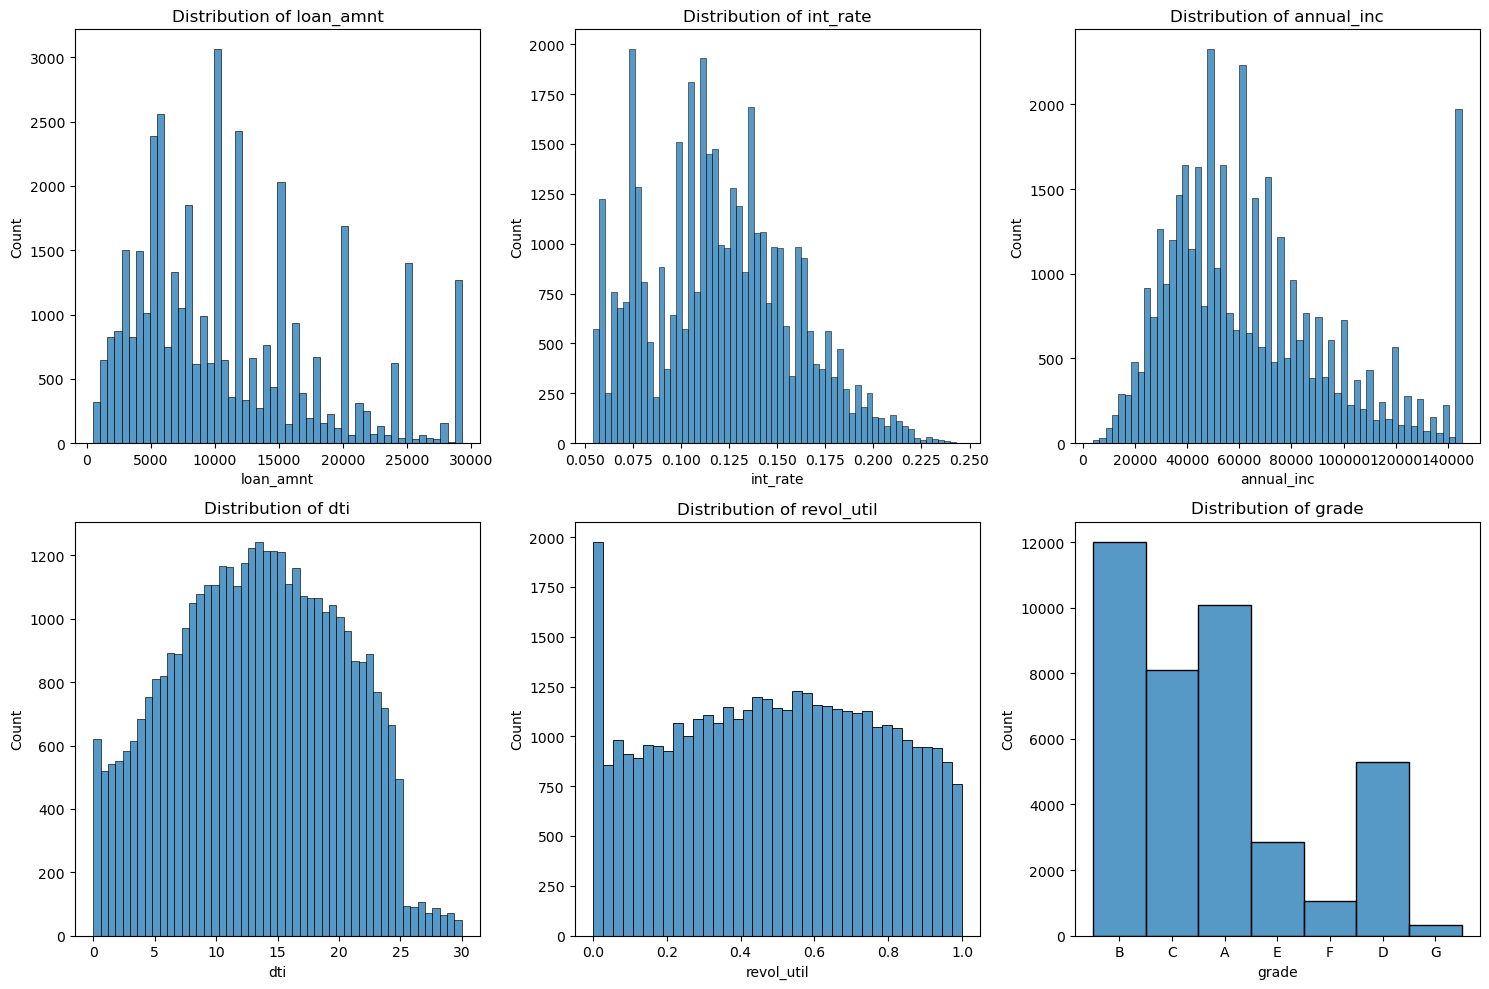

In [45]:
#Analysis of Key Numerical Variables
key_vars = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'revol_util','grade']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, var in enumerate(key_vars):
    sns.histplot(data=loan_data, x=var, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

In [46]:
#Segmented analysis by grade
grade_metrics = loan_data.groupby('grade').agg({
    'is_default': 'mean',
    'int_rate': 'mean',
    'loan_amnt': 'mean'
}).round(4)

print("Grade-wise Metrics:")
print(grade_metrics)

Grade-wise Metrics:
       is_default  int_rate   loan_amnt
grade                                  
A          0.0597    0.0734   8595.6544
B          0.1186    0.1102  11038.1364
C          0.1663    0.1355  10906.9122
D          0.2107    0.1572  12149.6655
E          0.2516    0.1771  15444.2030
F          0.3041    0.1975  17796.4252
G          0.3196    0.2140  19617.7215


<h3>Segmented Univariate Analysis</h3>

Text(0.5, 1.0, 'Default Rate by Grade and Revolving Utilization')

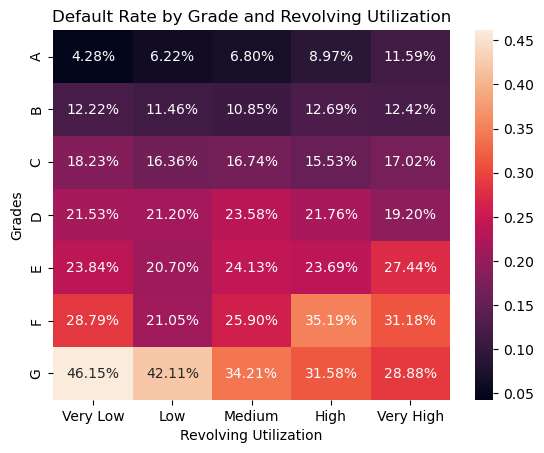

In [47]:
loan_data['revol_util_bin'] = pd.qcut(loan_data['revol_util'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
default_matrix = pd.crosstab(loan_data['grade'], loan_data['revol_util_bin'], values=loan_data['is_default'], aggfunc='mean')
default_matrix = default_matrix.reindex(grade_order)
sns.heatmap(default_matrix, annot=True, fmt='.2%')
plt.ylabel('Grades')
plt.xlabel('Revolving Utilization')
plt.title('Default Rate by Grade and Revolving Utilization')

Shows default rates by grade and revolving utilization
Darker indicates higher default rates
Higher grades (A-B) maintain low default rates even with high utilization

<h3>Bivariate Analysis</h3>

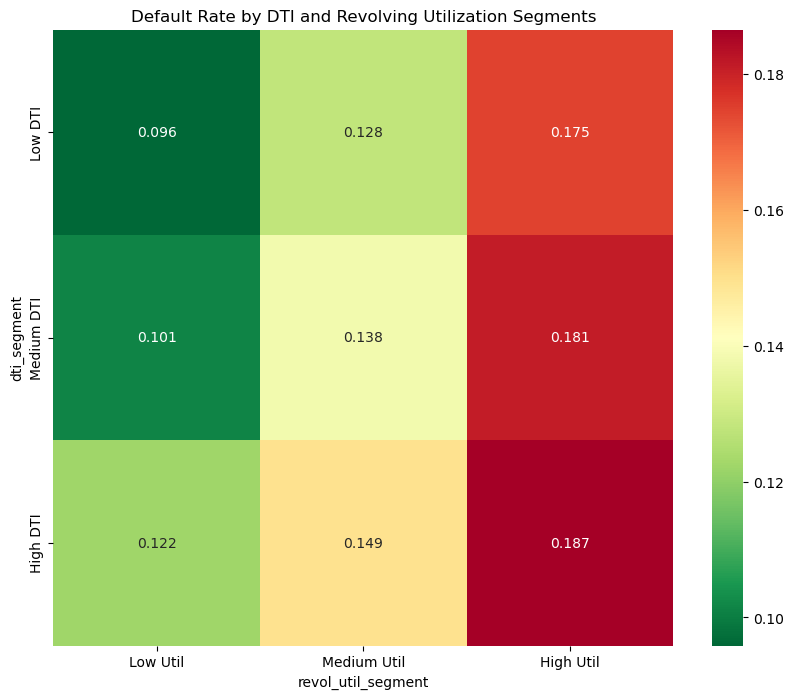

In [48]:
# Creating risk segments based on DTI and revolving utilization
# using qcut to create 3 bin low, medium and high
loan_data['dti_segment'] = pd.qcut(loan_data['dti'], q=3, labels=['Low DTI', 'Medium DTI', 'High DTI'])
loan_data['revol_util_segment'] = pd.qcut(loan_data['revol_util'], q=3, labels=['Low Util', 'Medium Util', 'High Util'])

# Calculate default rates by segment combinations
risk_matrix = pd.pivot_table(loan_data, values='is_default',
                           index='dti_segment',columns='revol_util_segment',
                           aggfunc='mean',observed=True)


plt.figure(figsize=(10, 8))
sns.heatmap(risk_matrix, annot=True, fmt='.3f', cmap='RdYlGn_r')
plt.title('Default Rate by DTI and Revolving Utilization Segments')
plt.show()

In [49]:
print("Risk Matrix - Default Rates:")
print(risk_matrix)

Risk Matrix - Default Rates:
revol_util_segment  Low Util  Medium Util  High Util
dti_segment                                         
Low DTI             0.095846     0.128049   0.174545
Medium DTI          0.101364     0.138106   0.181130
High DTI            0.122135     0.149377   0.186578


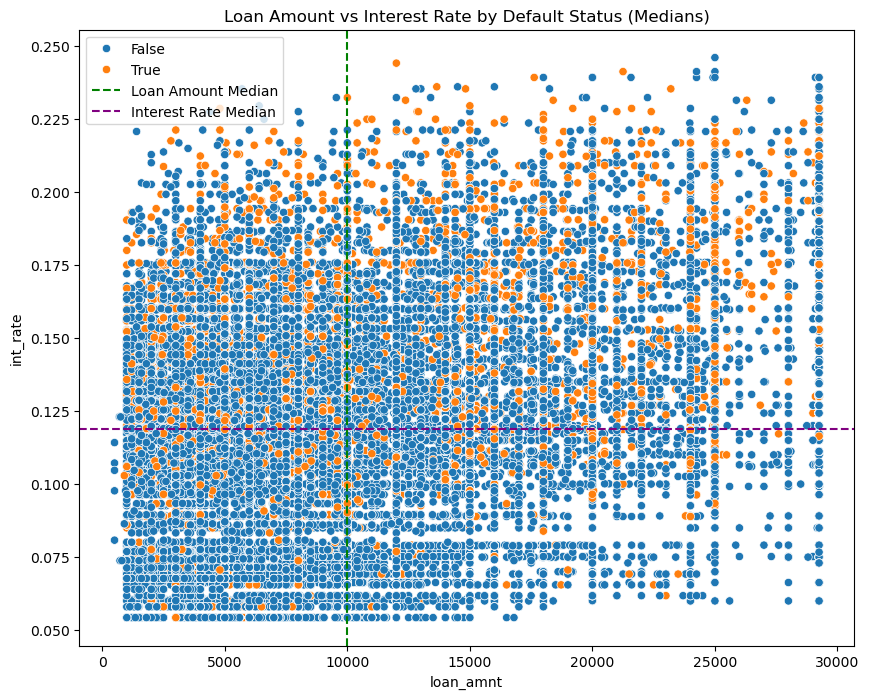

In [50]:
#this scatter plot shows a clear indication when loan amount and interest is high Higher chances of Default

loan_amnt_median = loan_data['loan_amnt'].median()
int_rate_median = loan_data['int_rate'].median()
plt.figure(figsize=(10, 8))
sns.scatterplot(data=loan_data, x='loan_amnt', y='int_rate', hue='is_default')
plt.axvline(loan_amnt_median, color='green', linestyle='--', label='Loan Amount Median')
plt.axhline(int_rate_median, color='purple', linestyle='--', label='Interest Rate Median')
plt.title('Loan Amount vs Interest Rate by Default Status (Medians)')
plt.legend()
plt.show()



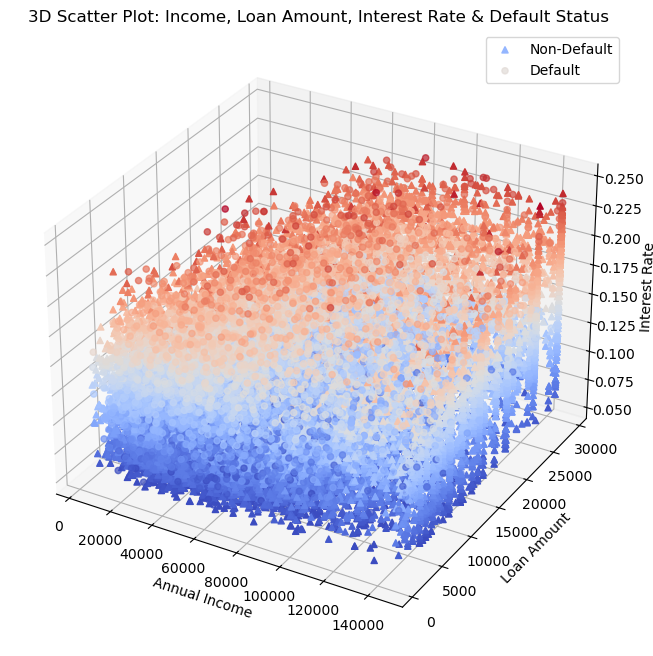

In [51]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for non-default (is_default=0)
non_default = loan_data[loan_data['is_default'] == 0]
ax.scatter(
    non_default['annual_inc'], 
    non_default['loan_amnt'], 
    non_default['int_rate'], 
    c=non_default['int_rate'], cmap='coolwarm', alpha=1, marker='^', label='Non-Default'
)

# Scatter plot for default (is_default=1)
default = loan_data[loan_data['is_default'] == 1]
ax.scatter(
    default['annual_inc'], 
    default['loan_amnt'], 
    default['int_rate'], 
    c=default['int_rate'], cmap='coolwarm', alpha=0.7, marker='o', label='Default'
)

ax.set_xlabel('Annual Income')
ax.set_ylabel('Loan Amount')
ax.set_zlabel('Interest Rate')
plt.title('3D Scatter Plot: Income, Loan Amount, Interest Rate & Default Status')

plt.legend()

plt.show()


<h2> This is to Show the Defult Rates based on income, loan amount and interest</h2>

In [52]:
# Define thresholds for income, interest rate, and loan amount
income_threshold = loan_data['annual_inc'].median()  # Median as threshold for income
interest_threshold = 10  # Example: 10% interest rate as high interest
loan_amount_threshold = loan_data['loan_amnt'].median()  # Median as threshold for loan amount

# Categorize based on these thresholds
loan_data['income_category'] = loan_data['annual_inc'].apply(lambda x: 'High' if x > income_threshold else 'Low')
loan_data['interest_category'] = loan_data['int_rate'].apply(lambda x: 'High' if x > interest_threshold else 'Low')
loan_data['loan_amount_category'] = loan_data['loan_amnt'].apply(lambda x: 'High' if x > loan_amount_threshold else 'Low')

# Now, calculate default rates for **all combinations**
grouped = loan_data.groupby(['income_category', 'interest_category', 'loan_amount_category'])['is_default'].mean() * 100

# Display the default rates for each combination
print(grouped)


income_category  interest_category  loan_amount_category
High             Low                High                    13.772823
                                    Low                     10.029638
Low              Low                High                    19.009833
                                    Low                     14.971972
Name: is_default, dtype: float64
